In [14]:
!pip install deepCR
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from deepCR import deepCR

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
path =  '/content/drive/My Drive/Colab Notebooks/subimg_pair.npy'

In [0]:
# For training only
# subimg_pair = np.load(path,allow_pickle = True)[()]

# images = []
# masks = []
# ignores = []

# for val in subimg_pair.values():
#   img, mask, ign = val
#   images.append(img)
#   mask = np.ones_like(mask) - mask
#   masks.append(mask)
#   ignores.append(ign)

# images = np.array(images)
# masks = np.array(masks)
# ignores = np.array(ignores)

# del subimg_pair

ts_subimg_pair = np.load(path.replace('subimg_pair.npy','ts_subimg_pair.npy'),allow_pickle = True)[()]

ts_images = []
ts_masks = []
ts_ignores = []

for val in ts_subimg_pair.values():
  img, mask, ign = val
  ts_images.append(img)
  ts_masks.append(mask)
  ts_ignores.append(ign)

ts_images = np.array(ts_images)
ts_masks = np.array(ts_masks)
ts_ignores = np.array(ts_ignores)

del ts_subimg_pair, ign, mask, img

In [0]:
from deepCR import train

In [0]:
num = 9984
# del trainer

In [0]:
trainer = train(images[:num,:,:], masks[:num,:,:], name='mymodel', gpu=True, epoch=50,
                save_after=20, plot_every=10, use_tqdm=False)

In [0]:
trainer.train()

In [22]:
f_name = trainer.save()
print(f_name)
del trainer

2020-06-07_mymodel_epoch50


In [0]:
sample_mdl = deepCR(mask="ACS-WFC-F606W-2-32",
         inpaint="ACS-WFC-F606W-2-32",
             device="CPU")

In [0]:
demo = path.replace('subimg_pair.npy', 'jdba2sooq_flc.fits')
demo_img = fits.getdata(demo)[:512,:512]
test_mdl = deepCR(mask=path.replace('subimg_pair.npy','2020-06-07_mymodel_epoch50.pth'), hidden=32, device = 'CPU')
sample_mask, sample_cleaned_img = sample_mdl.clean(demo_img, threshold = 0.5)
demo_mask, demo_cleaned_img = test_mdl.clean(demo_img, threshold = 0.5)

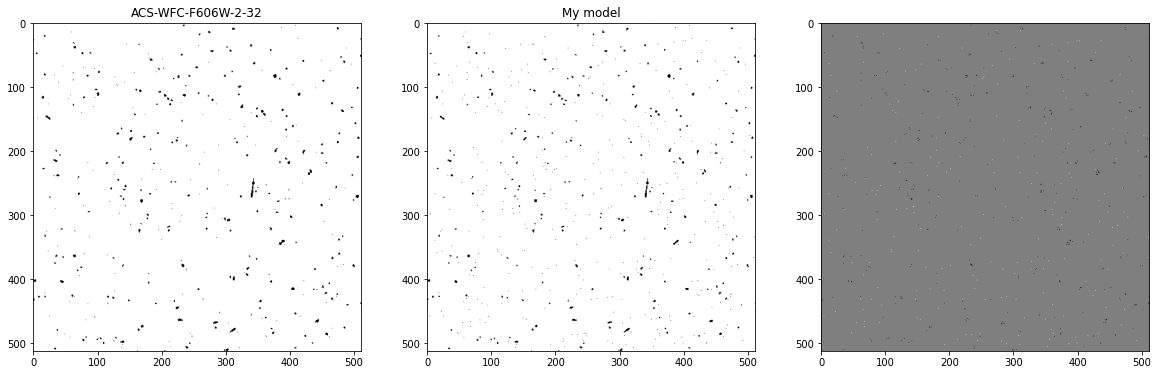

In [42]:
fig, axs = plt.subplots(1,3, figsize = (20,60), gridspec_kw={'width_ratios' : (20,20,20)})
axs[0].imshow(sample_mask, cmap = 'gray_r')
axs[1].imshow(demo_mask, cmap = 'gray_r')
im = axs[2].imshow(sample_mask-demo_mask, cmap = 'gray_r')
axs[0].set_title('ACS-WFC-F606W-2-32')
axs[1].set_title('My model')
plt.savefig(path.replace('subimg_pair.npy', 'mask_comparison.pdf'),format = 'pdf')

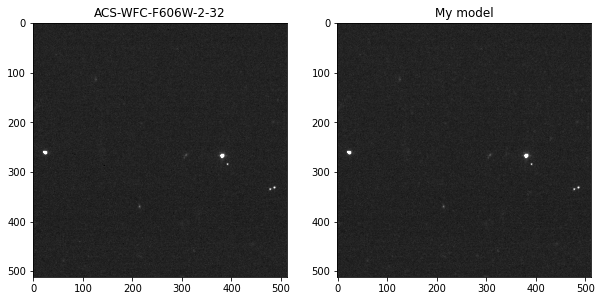

In [44]:
fig, axs = plt.subplots(1,2, figsize = (10,20), gridspec_kw={'width_ratios' : (10,10)})
axs[0].set_title('ACS-WFC-F606W-2-32')
axs[1].set_title('My model')
axs[0].imshow(sample_cleaned_img, cmap = 'gray', vmin = 0, vmax = 250)
axs[1].imshow(demo_cleaned_img, vmin = 0, vmax = 25000,cmap = 'gray')
plt.savefig(path.replace('subimg_pair.npy','result.pdf'), format = 'pdf')

In [0]:
from deepCR import roc

100%|██████████| 4096/4096 [53:46<00:00,  1.27it/s]

result saved


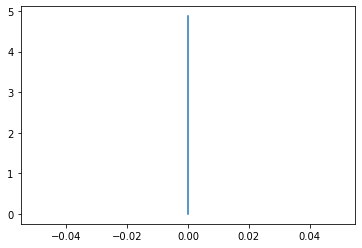

In [39]:
tpr, fpr = roc(test_mdl, image=ts_images, mask=ts_masks, ignore=ts_ignores)
try:
    np.save('tpr.npy', np.array(tpr))
    np.save('fpr.npy', np.array(fpr))
    print('result saved')
except:
    print('save failed')
plt.plot(fpr, tpr)
plt.show()

[4.86986622e+00 2.98886867e+00 2.36778516e+00 2.02229598e+00
 1.78967977e+00 1.61793767e+00 1.48332984e+00 1.37354507e+00
 1.28220628e+00 1.20430466e+00 1.13711645e+00 1.07829866e+00
 1.02629398e+00 9.79507348e-01 9.37463864e-01 8.99057378e-01
 8.64229161e-01 8.32252667e-01 8.02892199e-01 7.75664690e-01
 7.50443733e-01 7.27011911e-01 7.05105131e-01 6.84722227e-01
 6.65510038e-01 6.47302098e-01 6.30262541e-01 6.14151389e-01
 5.98918468e-01 5.84389921e-01 5.70722881e-01 5.57650534e-01
 5.45070977e-01 5.33305476e-01 5.21924638e-01 5.11133437e-01
 5.00756071e-01 4.90843101e-01 4.81244008e-01 4.72099199e-01
 4.63385727e-01 4.54931679e-01 4.46840126e-01 4.38940710e-01
 4.31389009e-01 4.24091675e-01 4.16948752e-01 4.10137207e-01
 4.03545415e-01 3.97158206e-01 3.90958079e-01 3.85029044e-01
 3.79194133e-01 3.73488351e-01 3.67984430e-01 3.62608083e-01
 3.57508272e-01 3.52531757e-01 3.47668813e-01 3.42943165e-01
 3.38397209e-01 3.33937987e-01 3.29566277e-01 3.25309693e-01
 3.21208298e-01 3.170781

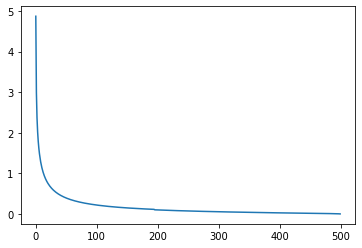

In [48]:
plt.plot(np.arange(len(tpr)),tpr)
print(tpr)